<a href="https://colab.research.google.com/github/komzy/spark-ml-course/blob/main/week1/Spark_with_ML_Week_1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part A: Homework/Assignment
Data : https://opendata.com.pk/dataset/corona-virus-pakistan-dataset-2020

Download the Covid19 dataset for Pakistan and save in your Google Drive (preferably)

* Load the data with Spark
* Save the copy in `Parquet` and `ORC` format
* Clean/transform the data if needed.


### Answer Below Questions

1. Plot the cummulative Suspected Cases/Tests/Admitted/Deaths/Recovered/
2. Group by cases based on States and other columns
3. Find the mean and median cases per day across Pakistan and different states Plot them for better visualization. 
4. Perform other analysis as you may think contribute in your learning

> All these exercises must be done using Spark operations and submitted in Google colab notebook format through LMS. 

**Due Date: 20:00 hrs 12/04/2021** 



In [ ]:
# Run below commands
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark
!ls spark-3.1.1-bin-hadoop3.2/bin

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [39]:
import findspark
import pyspark

findspark.init()

spark = SparkSession \
        .builder \
        .master("local[*]")\
        .appName('week1_assignment') \
        .getOrCreate()
# Test the spark 
spark
# Check the pyspark version
print(pyspark.__version__)

+-----+
|hello|
+-----+
|world|
|world|
|world|
+-----+
only showing top 3 rows

3.1.1


In [40]:
!ls

covid_final_data.xlsx  spark-3.1.1-bin-hadoop3.2
sample_data	       spark-3.1.1-bin-hadoop3.2.tgz


In [ ]:
from datetime import datetime, date
import pandas as pd
from pyspark.sql import Row

DataFrame[aa: bigint, bb: double, cc: string, dd: date, ee: timestamp]

In [184]:
#Load Data with Spark and convert to spark.DataFrames
pandas_df = pd.read_excel('covid_final_data.xlsx')
pandas_df["Date"]= pd.to_datetime(pandas_df.Date)

n= "Tests  performed in last 24 hours"    
input = pandas_df[n]
output = []
for letter in input :
        try :
            int(letter)
            output.append(letter)

        except ValueError :
                output.append(0)
                pass

pandas_df[n] = output
#pandas_df.head(52)

spark_df = spark.createDataFrame(pandas_df)
#spark_df.show(52,False)


In [ ]:
#write/read in ORC
spark_df.write.orc('covid_final_data.orc')
!ls
#spark.read.orc('covid_final_data.orc').show()

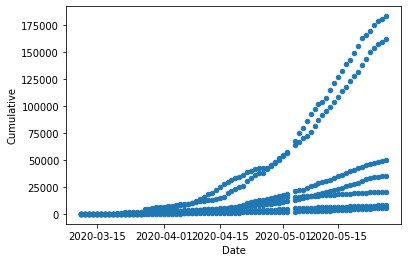

In [215]:
# Convert Spark DataFrame to Pandas. 
df_pandas = spark_df.toPandas()  
df_pandas.plot(x ='Date', y='Cumulative', kind = 'scatter')
